In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv('/home/rijul/Downloads/stroke/stroke/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df['bmi']=df['bmi'].fillna(df['bmi'].mode()[0])

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.885636,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698109,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


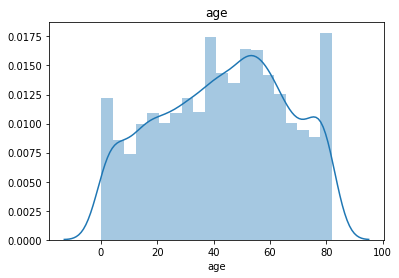

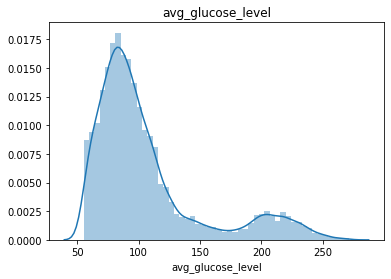

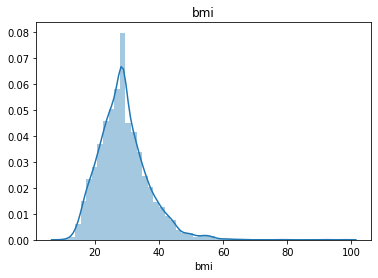

In [7]:
#df.drop(columns='id',inplace=True)
num_col=['age','avg_glucose_level','bmi']
for i in num_col:
    sn.distplot(df[i])
    plt.title(i)
    plt.show()

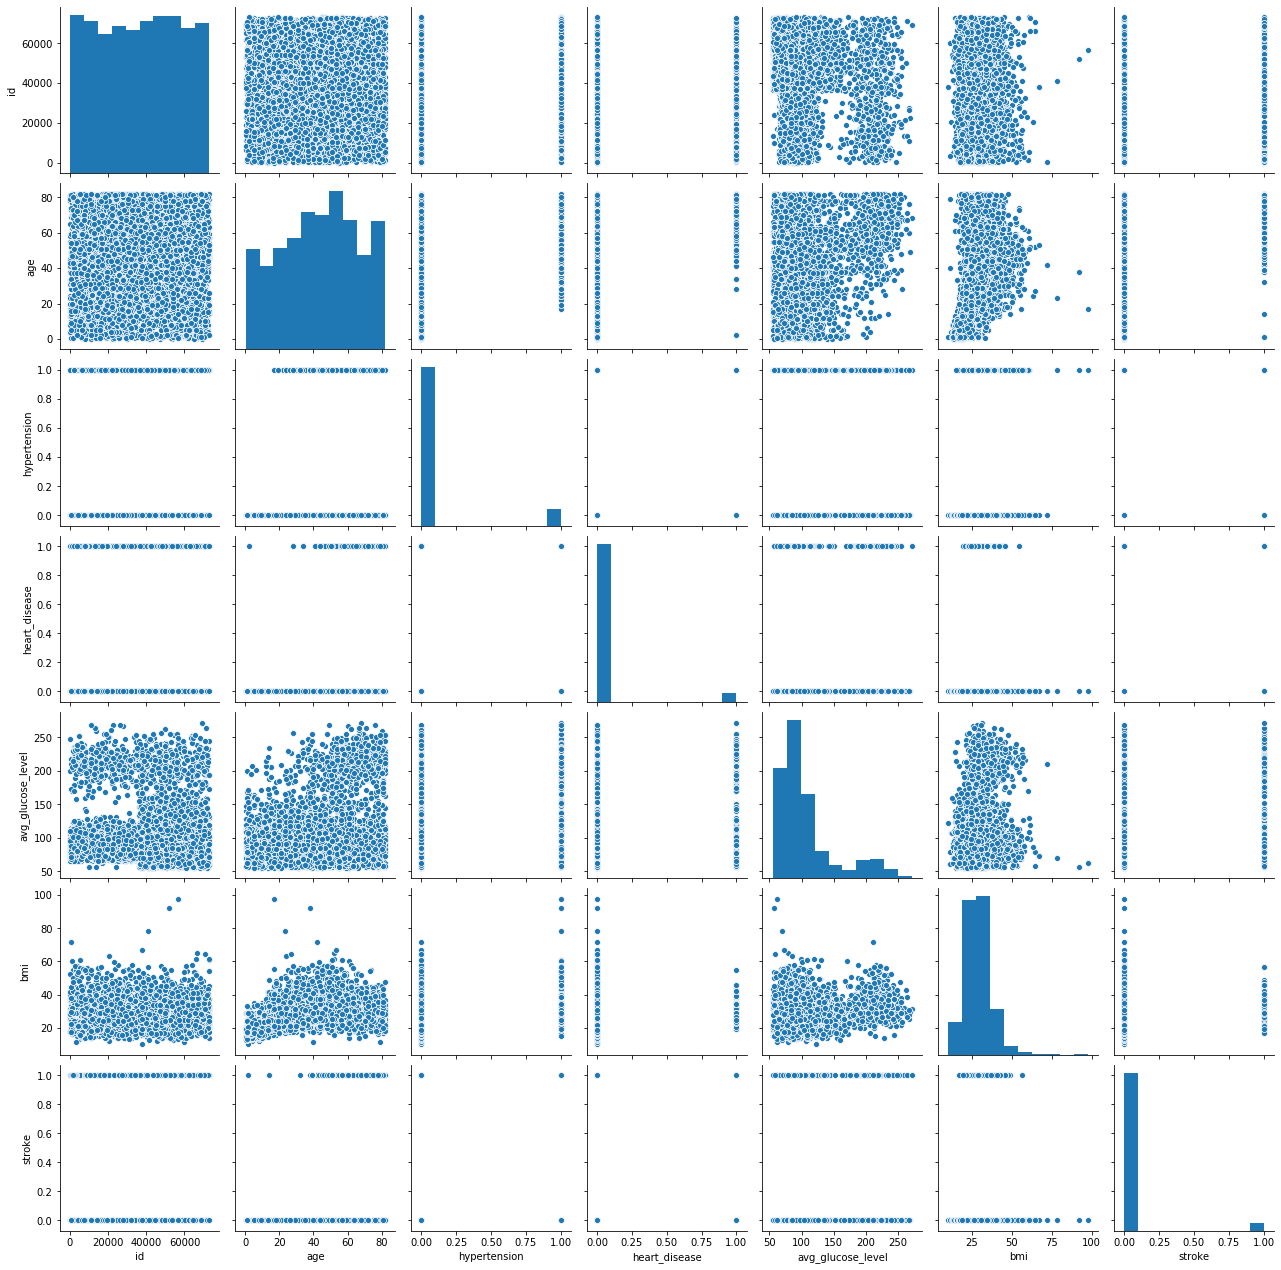

In [8]:
sn.pairplot(df)

In [57]:
from sklearn.ensemble import RandomForestClassifier as rf
model=rf()
x=pd.get_dummies(df.drop(columns=['stroke','id']),drop_first=True)
y=df['stroke']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y)

In [58]:
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score as AS
print(AS(y_test,model.predict(x_test)))

0.9624413145539906


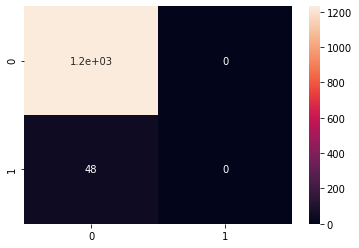

In [59]:
from sklearn.metrics import confusion_matrix as cm
CM=cm(y_test,model.predict(x_test))
sn.heatmap(CM,annot=True)

In [12]:
d1=df[df['stroke']==1]
d1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.7,Unknown,1


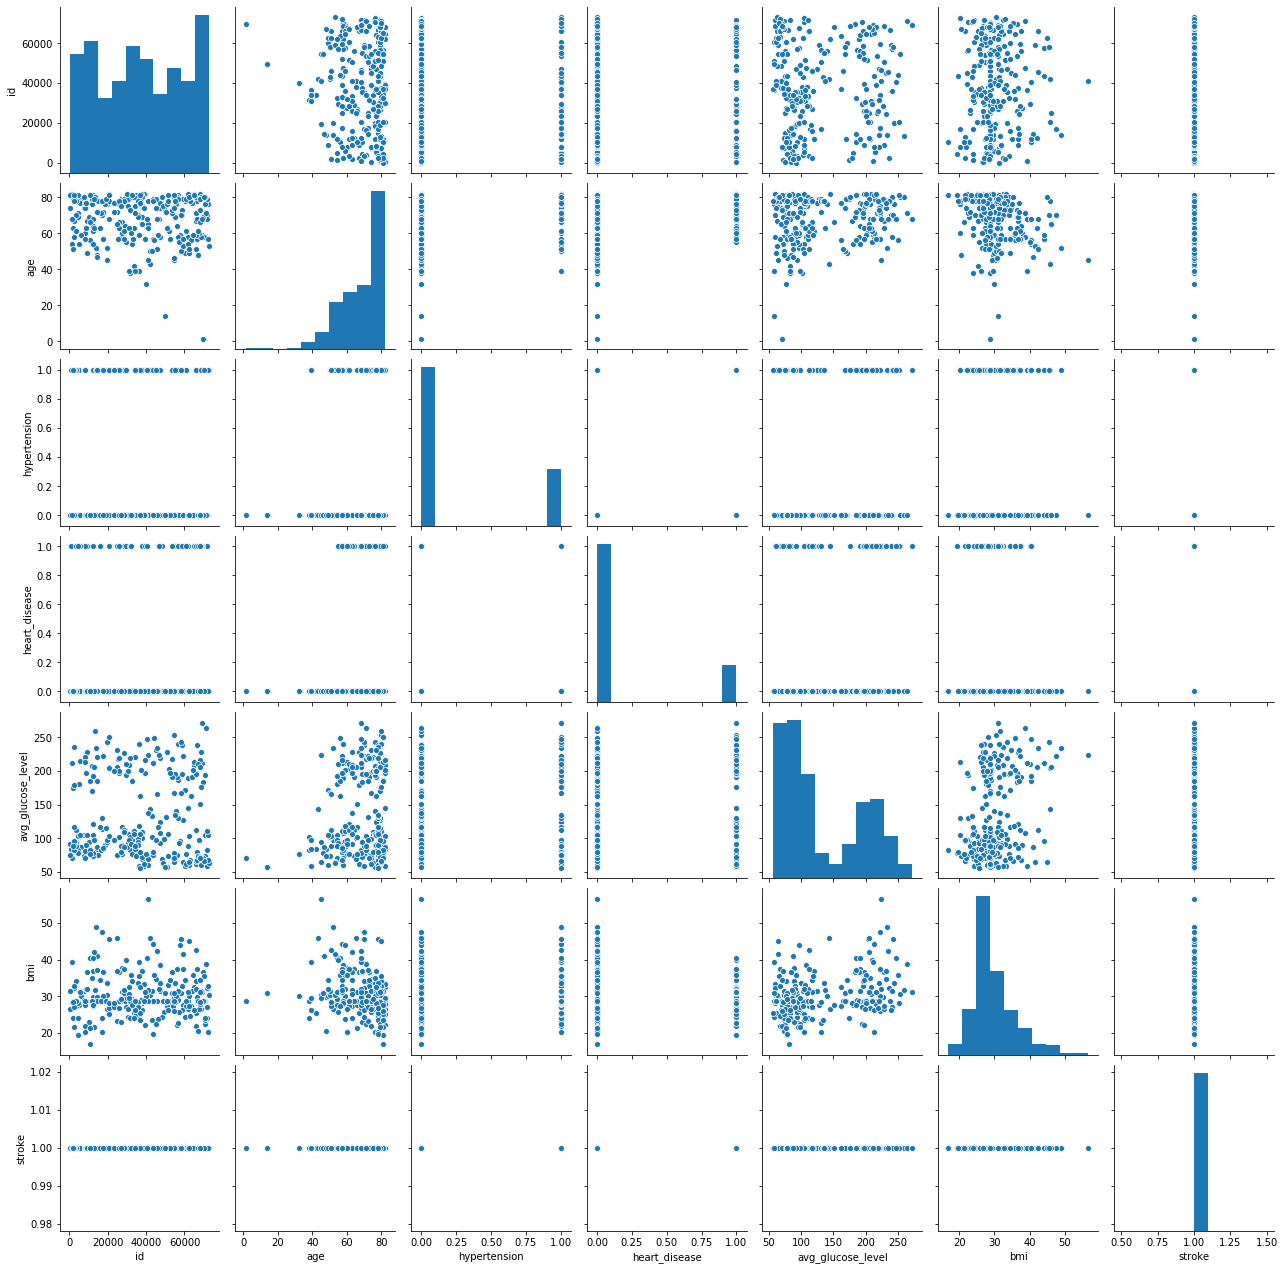

In [13]:
sn.pairplot(d1)

Text(0.5, 1.0, 'Stroke vs married people')

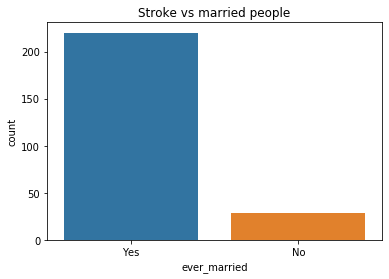

In [14]:
sn.countplot(d1['ever_married'])
plt.title('Stroke vs married people')

Haha, no shit!

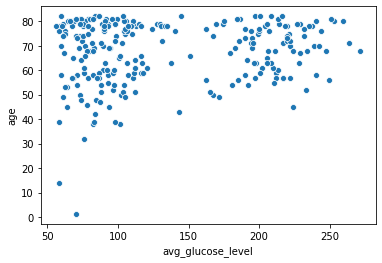

In [15]:
sn.scatterplot(d1['avg_glucose_level'],d1['age'])

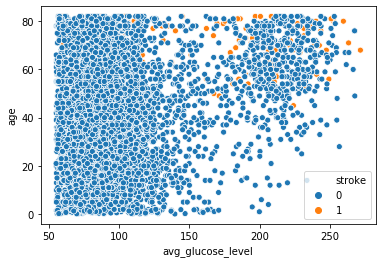

In [16]:
sn.scatterplot(df['avg_glucose_level'],df['age'],hue=df['stroke'])

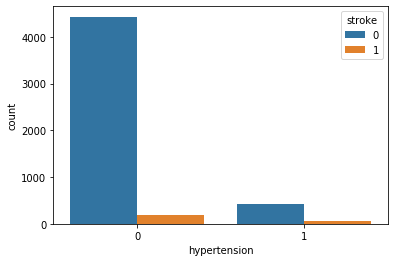

In [17]:
sn.countplot(df['hypertension'],hue=df['stroke'])

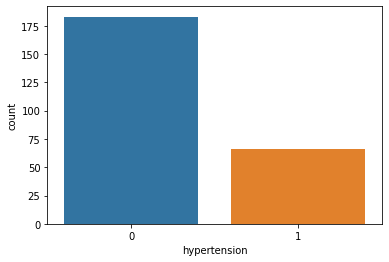

In [18]:
sn.countplot(d1['hypertension'])

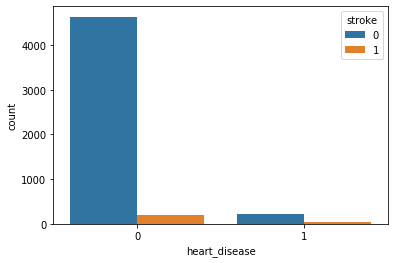

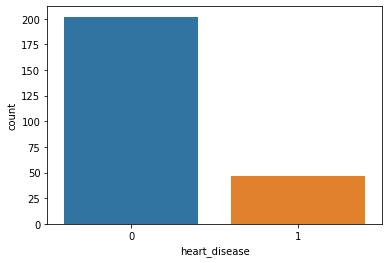

In [19]:
sn.countplot(df['heart_disease'],hue=df['stroke'])
plt.show()
sn.countplot(d1['heart_disease'])
plt.show()

These results were not expected as heart diseases and hypertension are believed to be contributing factors to heart attack. This indicates that these problems were not diagnosed early on in many cases.

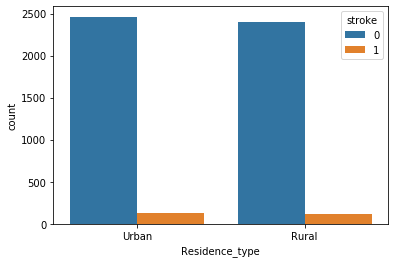

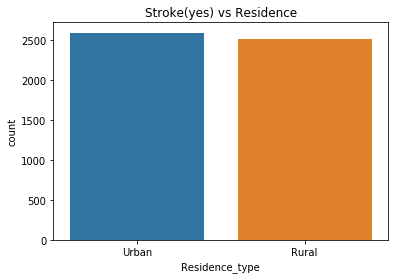

In [20]:
sn.countplot(df['Residence_type'],hue=df['stroke'])
plt.show()
sn.countplot(df['Residence_type'])
plt.title('Stroke(yes) vs Residence')
plt.show()

Both seem equally likely to get a stroke

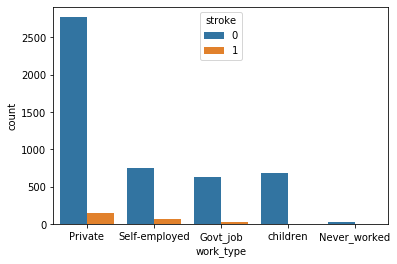

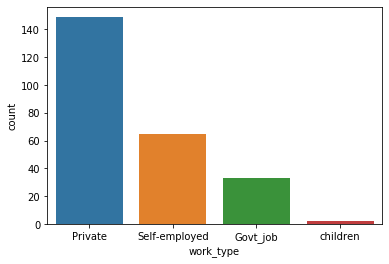

In [21]:
sn.countplot(df['work_type'],hue=df['stroke'])
plt.show()
sn.countplot(d1['work_type'])
plt.show()

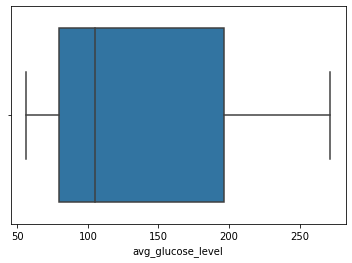

In [22]:
sn.boxplot(d1['avg_glucose_level'])

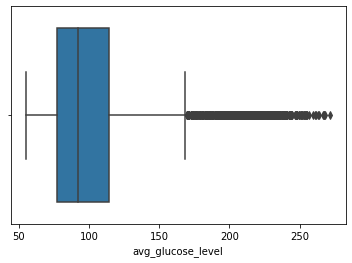

In [23]:
sn.boxplot(df['avg_glucose_level'])

In [24]:
print("Population average gluoce: ",df['avg_glucose_level'].mean(),'\nAverage glucose of people who got stroke: ',d1['avg_glucose_level'].mean())

Population average gluoce:  106.14767710371804 
Average glucose of people who got stroke:  132.54473895582322


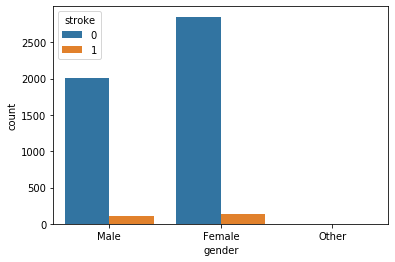

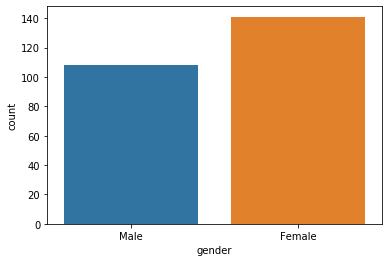

In [25]:
sn.countplot(df['gender'],hue=df['stroke'])
plt.show()
sn.countplot(d1['gender'])
plt.show()

Whaaaaaaaaaaaaa? So many of us believed that men are more prone to strokes. 

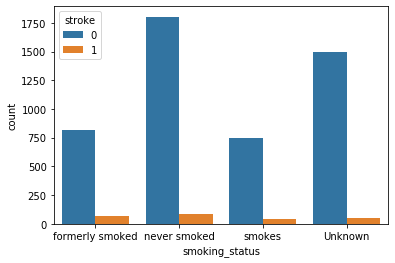

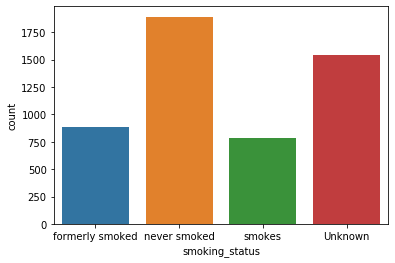

In [26]:
sn.countplot(df['smoking_status'],hue=df['stroke'])
plt.show()
sn.countplot(df['smoking_status'])
plt.show()

In [48]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()

In [60]:
x1,y1=sampler.fit_resample(x,y)

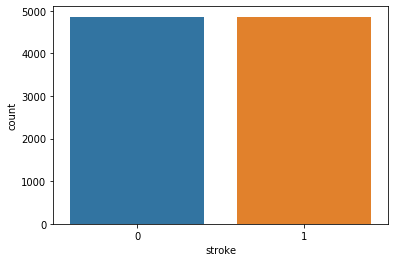

In [61]:
sn.countplot(y1)

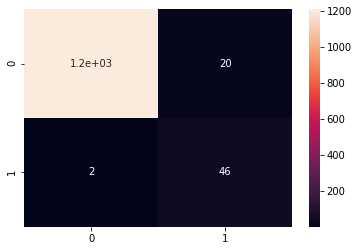

In [63]:
x1_train,x1_test,y1_train,y1_test=tts(x1,y1)
model.fit(x1_train,y1_train)
sn.heatmap(cm(y_test,model.predict(x_test)),annot=True)

Much better than the previous model

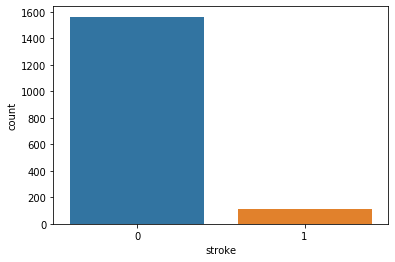

In [31]:
smoke=['smokes','formerly smoked']
df[df['smoking_status'].isin(smoke)]
sn.countplot(df[df['smoking_status'].isin(smoke)]['stroke'])

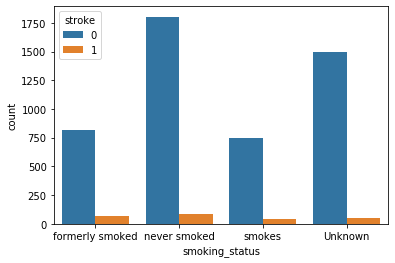

In [32]:
sn.countplot(df['smoking_status'],hue=df['stroke'])

In [39]:
papa=pd.DataFrame(data=['male',56,1,0,'Yes','Govt_job','Urban',100.00,25.9,'never smoked'],columns=['gender','age','hypertension','heart_disease','ever_married',])

In [40]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [42]:
papa

,0
0,male
1,56
2,1
3,0
4,Yes
5,Govt_job
6,Urban
7,100
8,25.9
9,never smoked


In [44]:
x_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3496,37395,16.00,0,0,63.63,20.0,0,0,0,0,1,0,0,1,0,0,1
3526,16774,79.00,0,0,74.36,39.2,0,0,0,0,0,1,0,1,0,0,0
959,56986,17.00,0,0,113.25,23.4,1,0,0,1,0,0,0,1,0,1,0
4985,37431,39.00,0,0,109.03,24.9,0,0,1,0,0,0,0,1,0,0,0
654,30567,71.00,1,0,94.65,25.3,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,38287,54.00,0,0,106.53,30.4,1,0,1,0,1,0,0,0,1,0,0
1587,28559,2.00,0,0,88.54,17.5,1,0,0,0,0,0,1,1,0,0,0
3999,67055,31.00,0,0,77.01,31.3,0,0,1,0,1,0,0,0,1,0,0
162,69768,1.32,0,0,70.37,28.7,0,0,0,0,0,0,1,1,0,0,0


,0
0,male
1,56
2,1
3,0
4,Yes
5,Govt_job
6,Urban
7,100
8,25.9
9,never smoked


In [64]:
x_test.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [73]:
papa=pd.DataFrame({'age':[56], 'hypertension':[1], 'heart_disease':[0], 'avg_glucose_level':[100.01], 'bmi':[25.9],
       'gender_Male':[1], 'gender_Other':[0], 'ever_married_Yes':[1],
       'work_type_Never_worked':[0], 'work_type_Private':[0],
       'work_type_Self-employed':[0], 'work_type_children':[0], 'Residence_type_Urban':[1],
       'smoking_status_formerly smoked':[0], 'smoking_status_never smoked':[1],
       'smoking_status_smokes':[0]})

In [74]:
papa

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,56,1,0,100.01,25.9,1,0,1,0,0,0,0,1,0,1,0


In [75]:
model.predict(papa)

array([0])